In [1]:
# Importare le librerie necessarie
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Caricare il dataset Iris
iris = load_iris(as_frame=True)

# Separare le feature (X) dal target (y)
X = iris.data
y = iris.target

# Ottenere i nomi delle feature e del target
features = X.columns
target = iris.target_names

# Creare un DataFrame combinato
df = pd.concat([X, y], axis=1)

# Visualizzare le prime righe del DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Estrazione delle feature di interesse
features = ["sepal length (cm)", "sepal width (cm)"]

# Divisione del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3, random_state=42)

# Normalizzazione dei dati
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

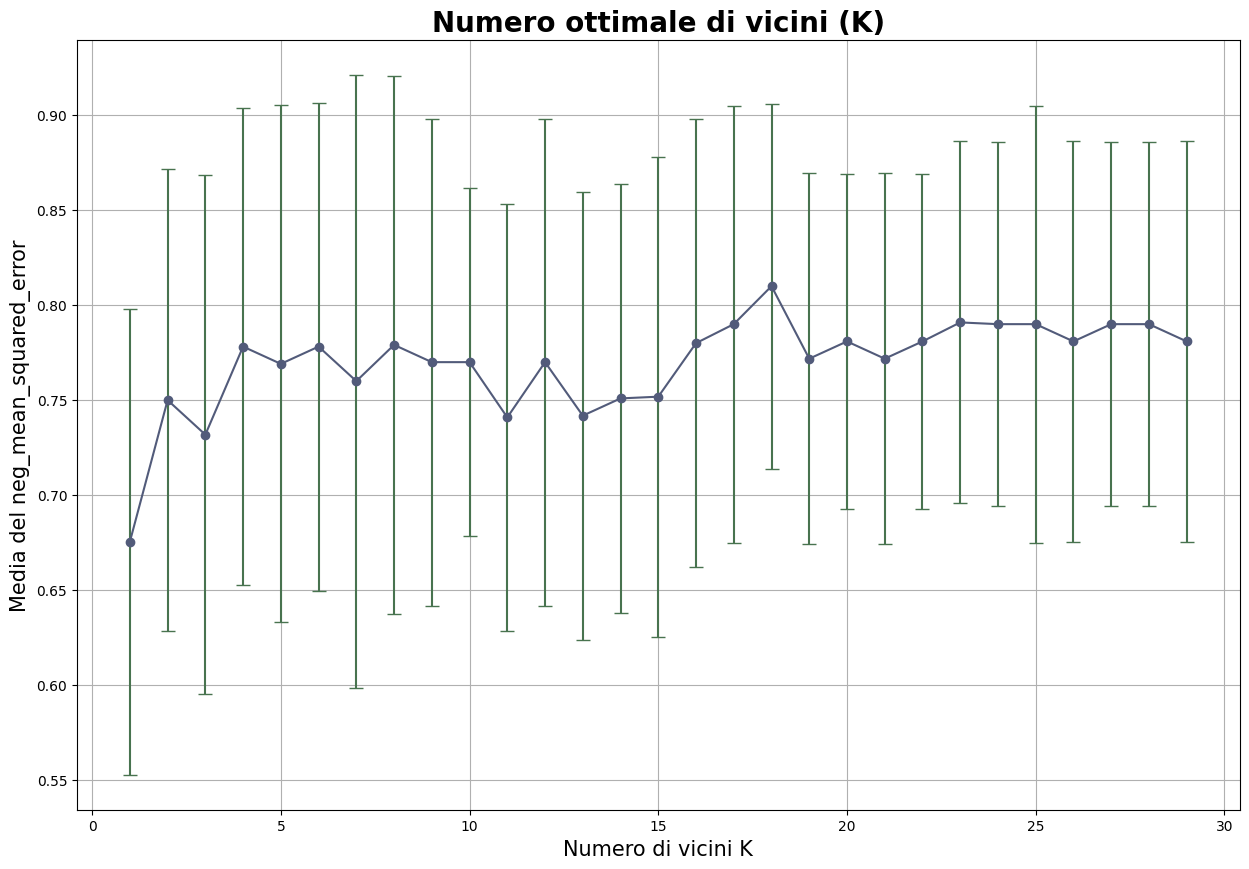

K: 28, accuracy: 0.7899999999999999
K: 27, accuracy: 0.7899999999999999
K: 25, accuracy: 0.79
K: 23, accuracy: 0.7909090909090909
K: 18, accuracy: 0.8099999999999999


In [3]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Creazione di una lista di valori di K per k-NN
k_list = list(range(1, 30, 1))

# Lista per memorizzare i punteggi di cross-validation
cv_scores = []

# Esecuzione della cross-validation a 10 fold
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores)

# Calcolo della media e della deviazione standard dei punteggi di cross-validation
mean_scores = [np.mean(score) for score in cv_scores]
std_scores = [np.std(score) for score in cv_scores]

# Plot della media dei punteggi di cross-validation con barre di errore
plt.figure(figsize=(15, 10))
plt.errorbar(k_list, mean_scores, yerr=std_scores, fmt='-o', color='#525b7a', ecolor='#48734f', capsize=5)
plt.title('Numero ottimale di vicini (K)', fontsize=20, fontweight='bold')
plt.xlabel('Numero di vicini K', fontsize=15)
plt.ylabel('Media del neg_mean_squared_error', fontsize=15)
plt.grid(True)
plt.show()

# Identificazione dei 5 valori di K con i punteggi di neg_mean_squared_error più alti (meno negativi)
top_5_indices = np.argsort(mean_scores)[-5:]  # Indici dei 5 valori con punteggio più alto
top_5_k = [k_list[i] for i in top_5_indices]  # I 5 valori di K corrispondenti
top_5_scores = [mean_scores[i] for i in top_5_indices]  # I 5 punteggi medi corrispondenti

# Stampa dei risultati
for k, score in zip(top_5_k, top_5_scores):
    print(f"K: {k}, accuracy: {score}")

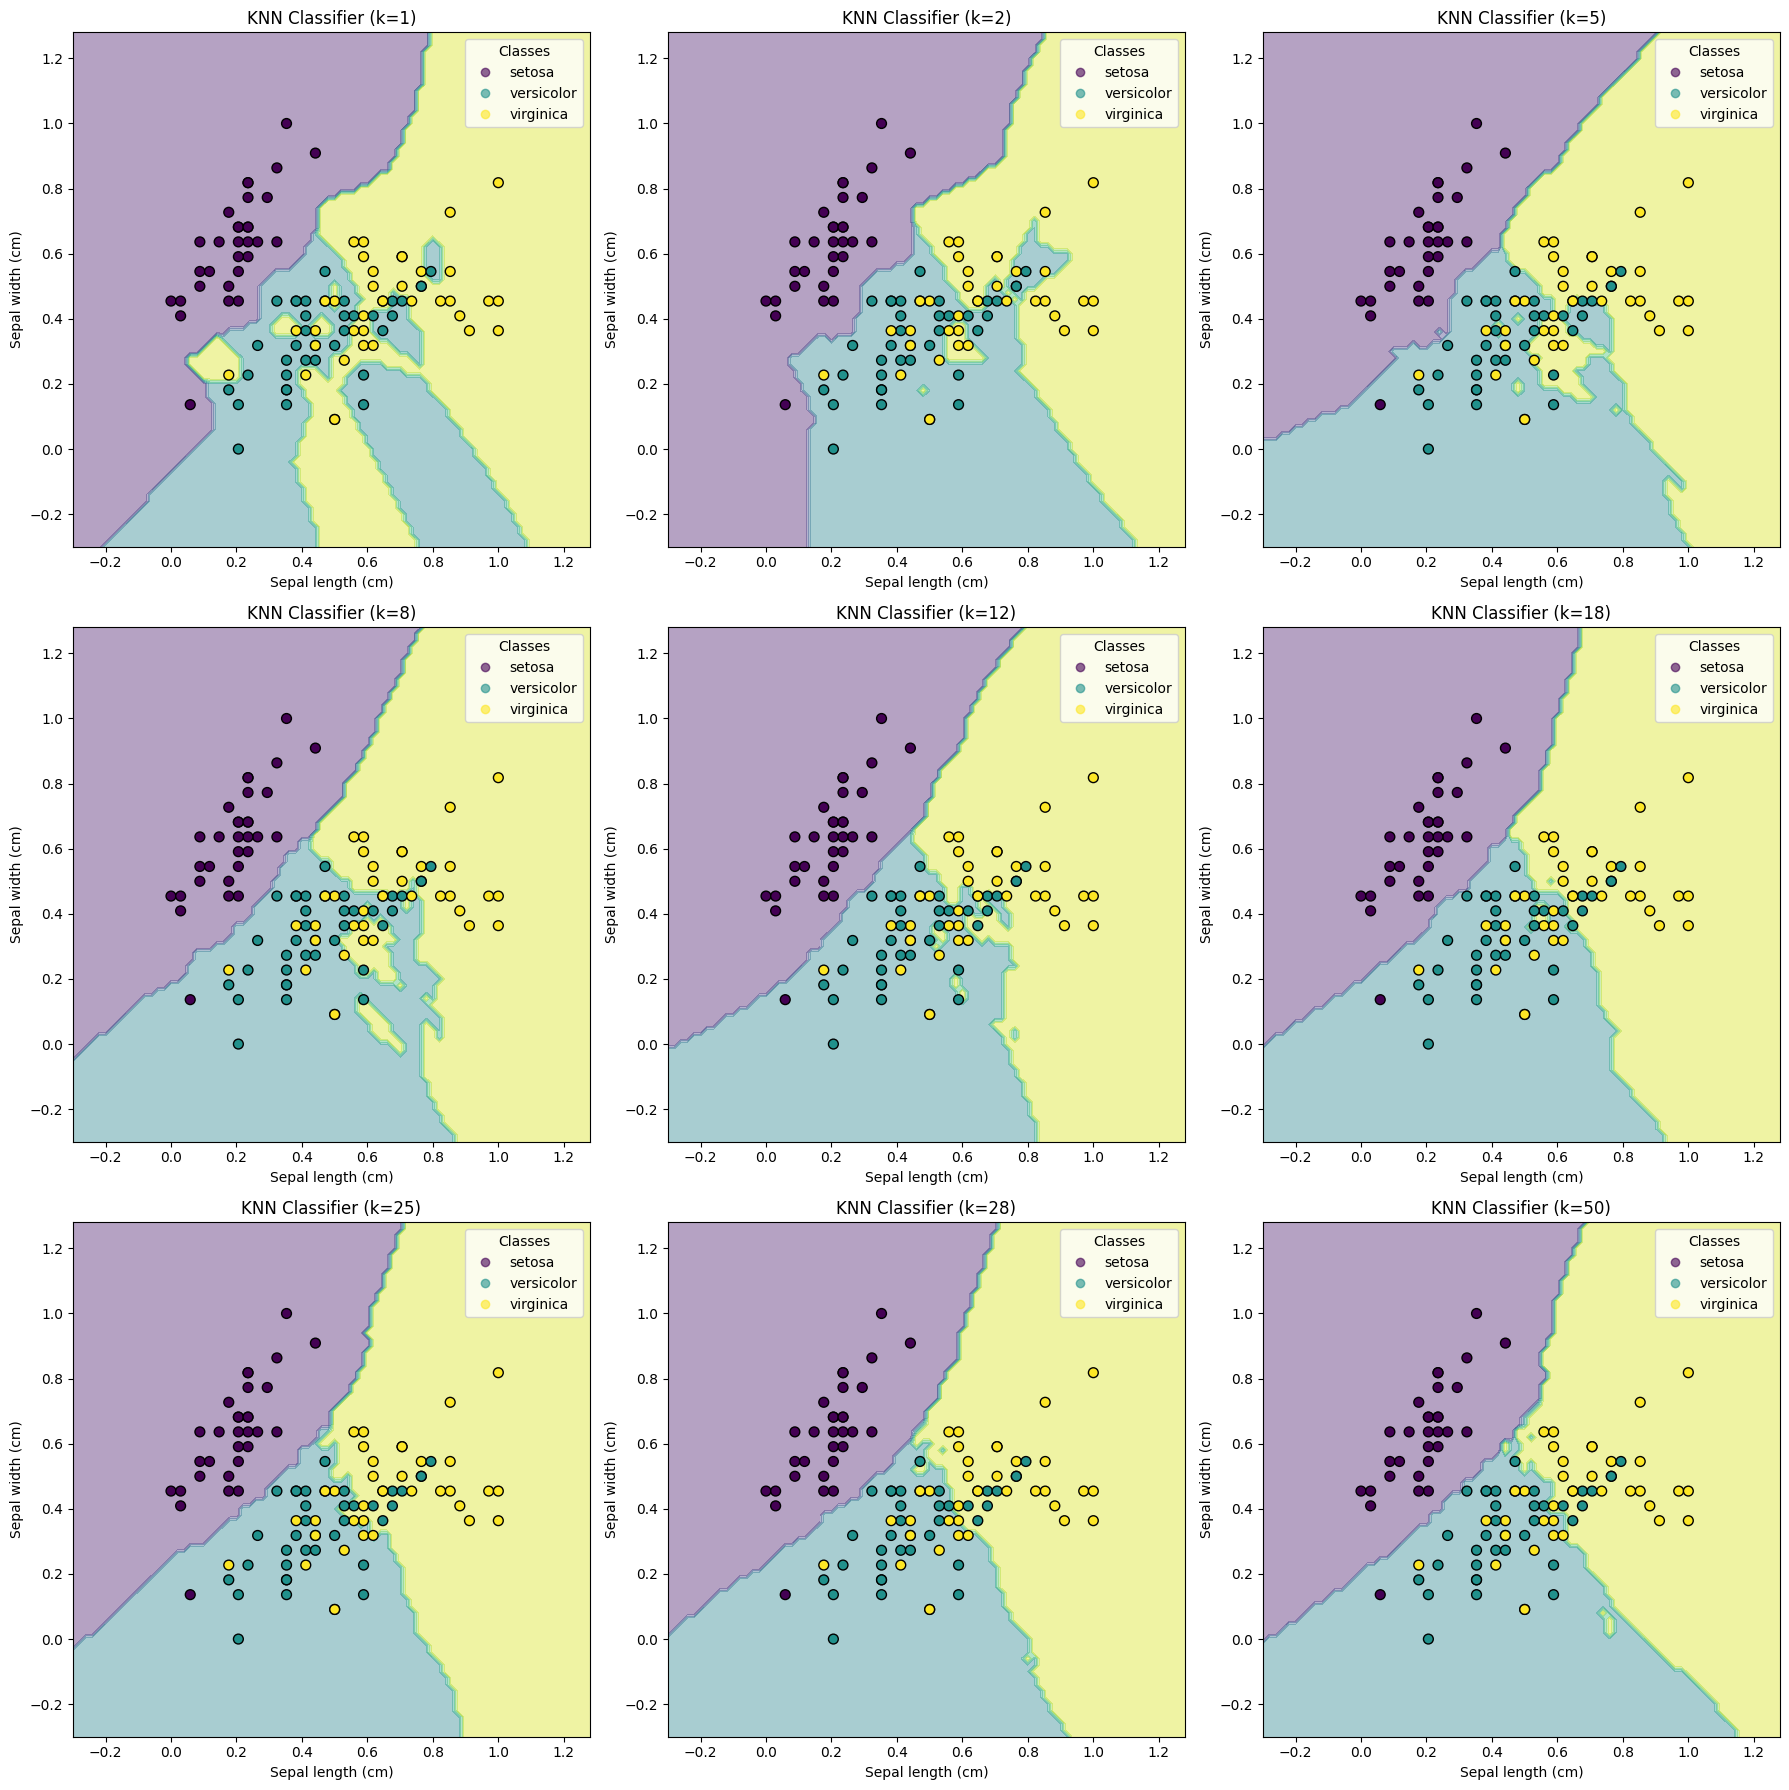

In [17]:
# Applicare lo scaling ai dati di training
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista dei valori di k da testare
k_values = [1, 2, 5, 8, 12, 18, 25, 28, 50]

# Nomi degli assi
xlabel = 'Sepal length (cm)'
ylabel = 'Sepal width (cm)'

# Definizione della funzione per tracciare le decision boundaries utilizzando contourf
def plot_decision_boundaries(X, y, model, ax, title):
    h = .02  # Passo della mesh
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Creazione manuale della legenda
    handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
    ax.legend(handles=handles, labels=list(iris.target_names), title="Classes")

# Creazione della figura
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Iterazione sui valori di k e plot delle decision boundaries
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', n_jobs=-1)
    knn.fit(X_train_scaled, y_train)
    ax = axes[i // 3, i % 3]  # Posizione nella griglia 2x3
    plot_decision_boundaries(X_train_scaled, y_train, knn, ax, f'KNN Classifier (k={k})')

plt.tight_layout()
plt.show()